* Compile, Train and Save the models here

* 1. Preprocessing

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # CSV file
import config
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import davies_bouldin_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

In [2]:
def Scale_and_PCALDA(path):

    data = pd.read_csv(path)
    num_columns = data.shape[1]
    print(f"Num of Columns is {num_columns}")
    X = np.array(data.iloc[:,0:num_columns-1])
    y = np.array(data.iloc[:,num_columns-1])
    # print(len(X[0]))
    # print(y[0])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # X shape: (n_samples, 12)

    ''' PCA '''
    n_components = 2
    pca_object = PCA(n_components= n_components)
    pca_object.fit(X_scaled)
    PrincipleComps = pca_object.transform(X_scaled)
    classes = np.unique(y)

    for i in range(n_components):
        plt.figure()
        for clss in classes:
            plt.hist(PrincipleComps[y == clss, i],
                    bins="auto", alpha=0.5, 
                    label=f"Class {clss}")
        plt.xlabel("Feature intervals")
        plt.ylabel("Frequency")
        plt.title(f"PCA by Class for feature column {i}")
        plt.legend()
        plt.grid(True)
        plt.show()
    score = davies_bouldin_score(PrincipleComps, y)
    print(f"The davies_bouldin_score for PCA is {score}")


    """ LDA """

    lda_mcc = LDA()
    lda_mcc.fit(X_scaled,y)
    lda_OP = lda_mcc.transform(X_scaled)
    plt.figure()
    for c in classes:
        plt.hist(lda_OP[y == c], bins=20, alpha=0.5, label=f"Class {c}")
    plt.xlabel("1D LDA Projection")
    plt.ylabel("Frequency")
    plt.title("LDA Projection onto First Component. 0 is cat, 1 is Dog")
    plt.legend()
    plt.grid(True)
    plt.show()

Original DATA
Num of Columns is 13


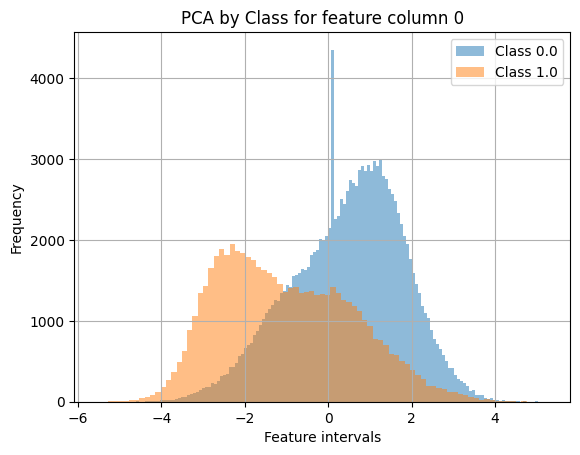

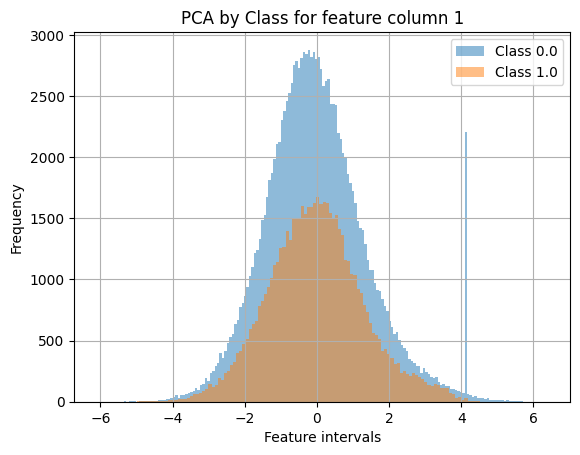

The davies_bouldin_score for PCA is 2.4210080452769374


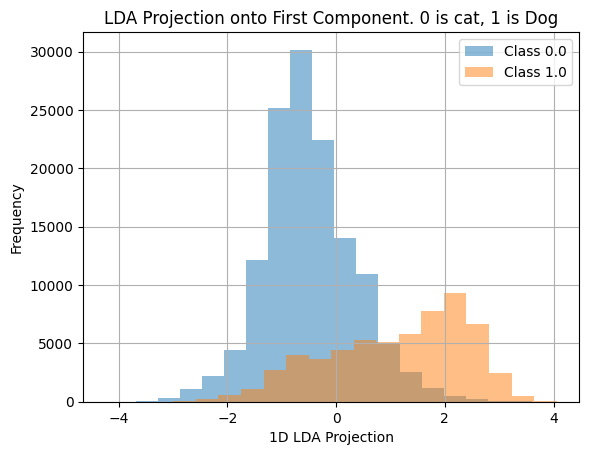

fs300_cc12
Num of Columns is 13


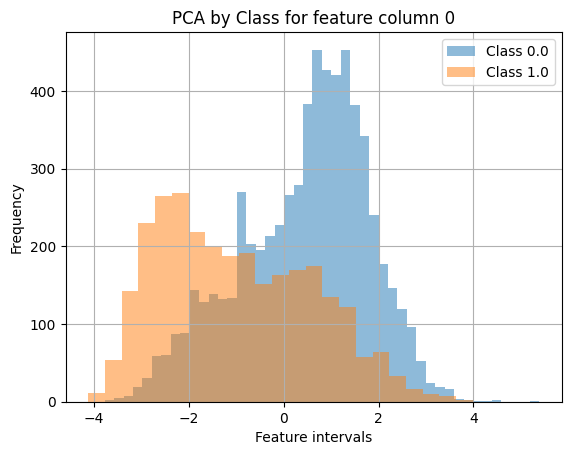

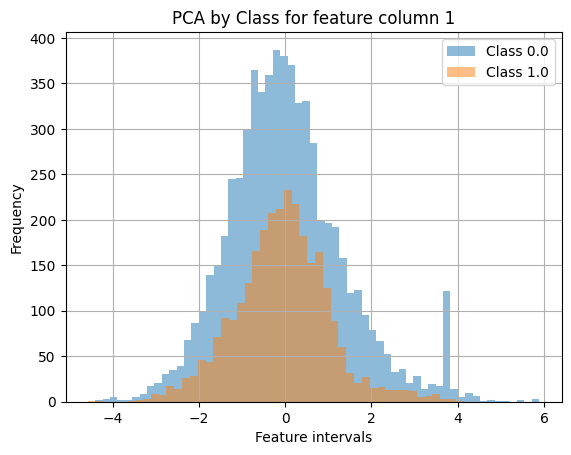

The davies_bouldin_score for PCA is 2.352105520991345


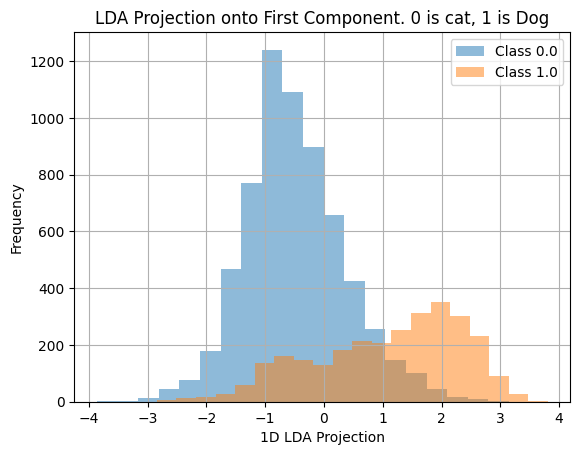

fs300_cc20
Num of Columns is 21


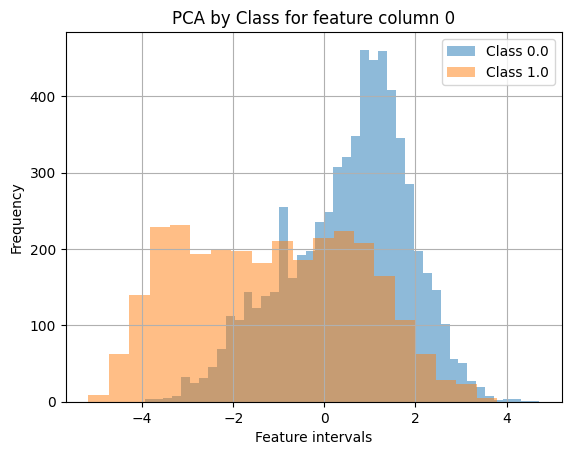

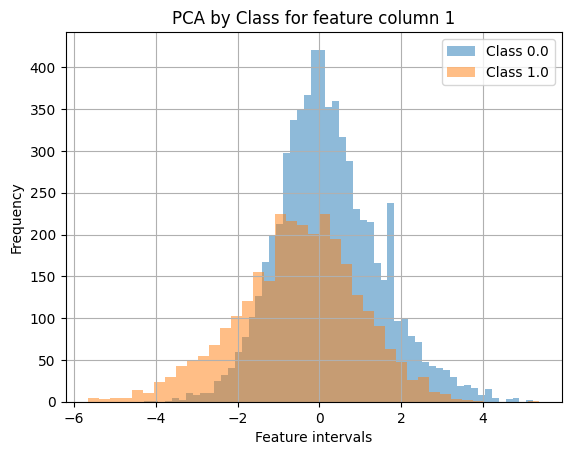

The davies_bouldin_score for PCA is 2.074218457896792


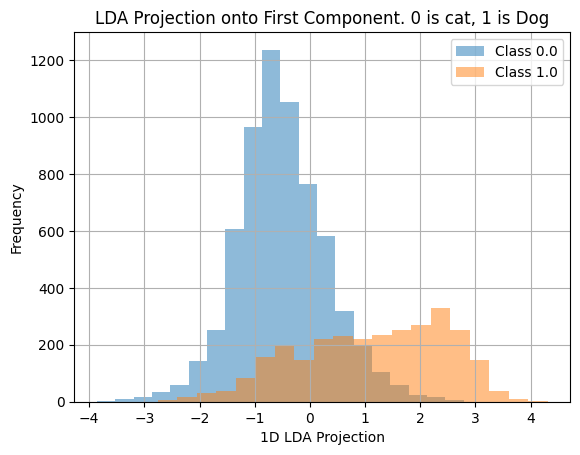

fs300_cc30
Num of Columns is 31


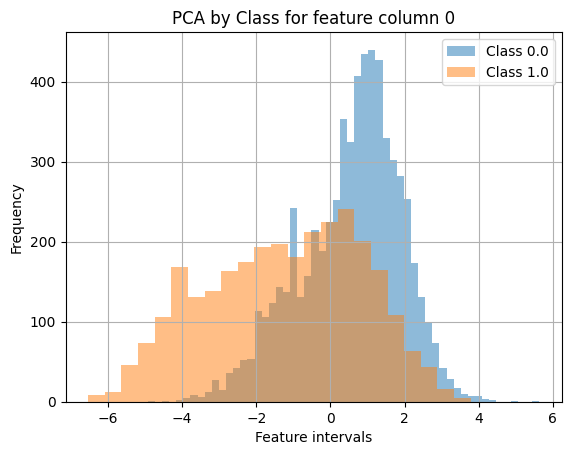

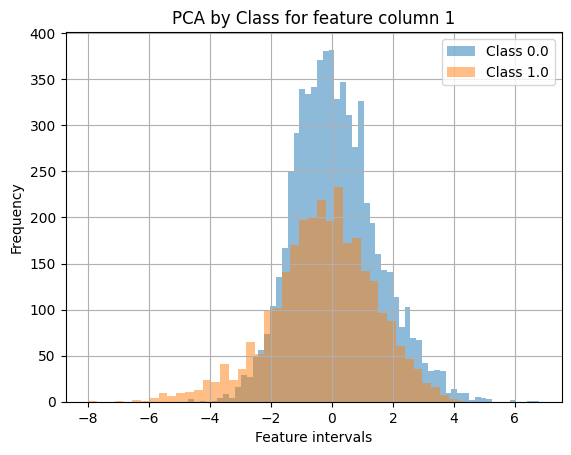

The davies_bouldin_score for PCA is 2.240011271309776


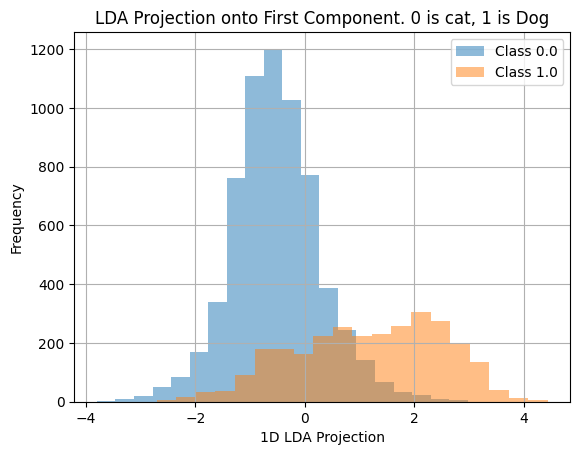

fs500_cc20
Num of Columns is 21


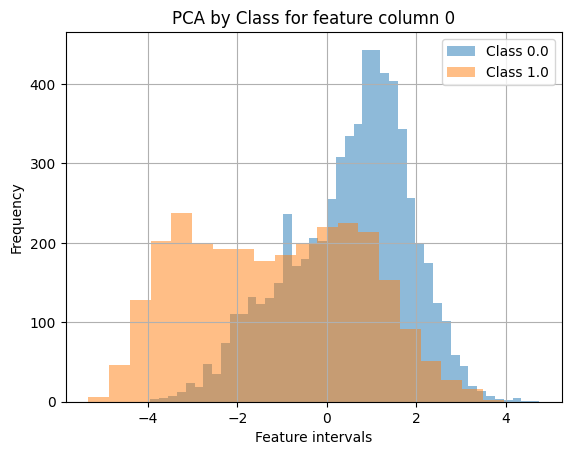

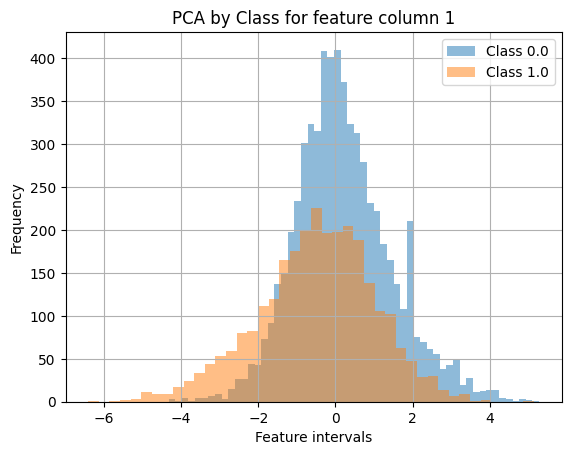

The davies_bouldin_score for PCA is 2.114031396395511


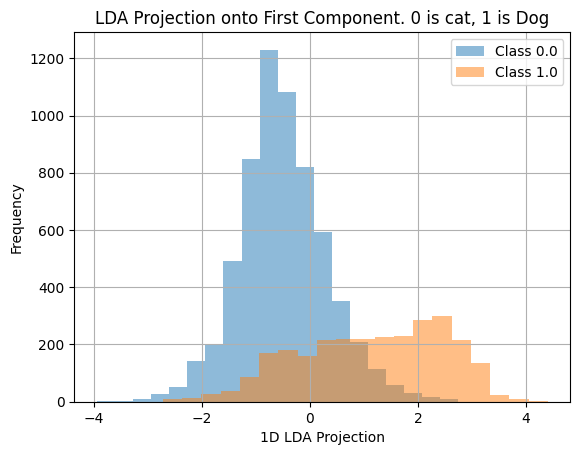

In [3]:

print("Original DATA")
Scale_and_PCALDA(path = config.Features + 'data.csv' )

print("fs300_cc12")
Scale_and_PCALDA(path = config.Features + 'data_fs300_cc12.csv')

print("fs300_cc20")
Scale_and_PCALDA(path = config.Features + 'data_fs300_cc20.csv')

print("fs300_cc30")
Scale_and_PCALDA(path = config.Features + 'data_fs300_cc30.csv')

print("fs500_cc20")
Scale_and_PCALDA(path = config.Features + 'data_fs500_cc20.csv')

* 2. Training the model

* First approach- Vanilla NN 
* fs300_cc20 looks good. Let us see....................

In [4]:
data = pd.read_csv(config.Features + 'data_fs300_cc20.csv')
num_columns = data.shape[1]
X = np.array(data.iloc[:,0:num_columns-1])
y = np.array(data.iloc[:,num_columns-1])
# print(len(X[0]))
# print(y[0])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,        
    stratify=y,           
    random_state=42        
)



In [5]:

model = Sequential([
    Dense(64, input_shape=(20,), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)


Epoch 1/50


c:\Users\desly\ml_lab\lab-env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6412 - loss: 0.6799 - val_accuracy: 0.8338 - val_loss: 0.4332
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 0.4711 - val_accuracy: 0.8465 - val_loss: 0.3869
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8249 - loss: 0.4201 - val_accuracy: 0.8539 - val_loss: 0.3687
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8379 - loss: 0.4048 - val_accuracy: 0.8599 - val_loss: 0.3566
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8493 - loss: 0.3840 - val_accuracy: 0.8633 - val_loss: 0.3492
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8382 - loss: 0.3926 - val_accuracy: 0.8706 - val_loss: 0.3442
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8551 - loss: 0.3656 - val_accuracy: 0.8767 - val_loss: 0.3323
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8524 - loss: 0.3640 - val_accuracy: 0.8794 - val_

In [6]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8993 - loss: 0.2592
Test Accuracy: 0.90


* Second approach- Vanilla NN and fs500_cc20 dataset

In [7]:
data = pd.read_csv(config.Features + 'data_fs500_cc20.csv')
num_columns = data.shape[1]
X = np.array(data.iloc[:,0:num_columns-1])
y = np.array(data.iloc[:,num_columns-1])
# print(len(X[0]))
# print(y[0])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,         
    stratify=y,            
    random_state=42       
)

In [8]:

# Define the model
model = Sequential([
    Dense(64, input_shape=(20,), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=80,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/80


c:\Users\desly\ml_lab\lab-env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6616 - loss: 0.7173 - val_accuracy: 0.8315 - val_loss: 0.4111
Epoch 2/80
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8026 - loss: 0.4690 - val_accuracy: 0.8501 - val_loss: 0.3685
Epoch 3/80
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8447 - loss: 0.4048 - val_accuracy: 0.8591 - val_loss: 0.3462
Epoch 4/80
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8499 - loss: 0.3874 - val_accuracy: 0.8688 - val_loss: 0.3309
Epoch 5/80
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8475 - loss: 0.3905 - val_accuracy: 0.8695 - val_loss: 0.3211
Epoch 6/80
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8497 - loss: 0.3737 - val_accuracy: 0.8709 - val_loss: 0.3148
Epoch 7/80
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8552 - loss: 0.3760 - val_accuracy: 0.8771 - val_loss: 0.3063
Epoch 8/80
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8648 - loss: 0.3536 - val_accuracy: 0.8805 - val_

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9031 - loss: 0.2383
Test Accuracy: 0.90


* Approach 3 - 1D convolutional model and fs300cc12 dataset

In [10]:
data = pd.read_csv(config.Features + 'data_fs300_cc20.csv')
num_columns = data.shape[1]
X = np.array(data.iloc[:,0:num_columns-1])
y = np.array(data.iloc[:,num_columns-1])
# print(len(X[0]))
# print(y[0])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,         
    stratify=y,            
    random_state=42        
)

In [11]:
# Define input shape
num_mfcc = 20
num_frames = 50  # adjust depending on your data
input_shape = (num_frames, num_mfcc)

model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


c:\Users\desly\ml_lab\lab-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 48, 32)         │         1,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 48, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 24, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 22, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 22, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,729 (209.88 KB)

 Trainable params: 53,537 (209.13 KB)

 Non-trainable params: 192 (768.00 B)

In [12]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)


Epoch 1/30


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 20), dtype=float32). Expected shape (None, 50, 20), but input has incompatible shape (None, 20)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 20), dtype=float32)
  • training=True
  • mask=None

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")
